<img src="https://upload.wikimedia.org/wikipedia/fr/b/bf/Universit%C3%A9_Laval_logo_et_texte.svg" width=200 align="right"><br>



Optoélectronique GEL-4203, GEL-7041 

Département de Génie Électrique et de Génie Informatique

Automne 2024

Université Laval



# Travail 1 

##### Remise 
- Votre notebook (.ipynb) ou un document au format PDF contenant vos démarches, réponses clairement identifiées et vos scripts (Python, Matlab ou autre
- Sur la boîte de dépôt dans monportail
- Au plus tard le lundi 23 septembre 2024 à 12h30

##### Équipe
- Ce travail est *individuel*

##### Pondération : 
- GEL-4203 : Ce travail vaut pour *5%* de la note finale
- GEL-7041 : Ce travail vaut pour *5%* de la note finale

## Identification
# Philippe Arsenault (PHARS10)

## Consignes pour répondre aux questions
- Utilisez des cellules de Markdown pour fournir des explications écrites et des équations mathématiques.
    - Vous pouvez faire une équation $\LaTeX$ sur une ligne: $\sum_{n = 0}^\infty x^n$.
    - Vous pouvez faire une équation $\LaTeX$ centrée: $$\sum_{n = 0}^\infty x^n.$$
    - Vous pouvez imbriquer des listes:
        - Niveau 2
            - Niveau 3
- Utilisez des cellules de code pour effectuer vos calculs numériques. Prenez soin de bien commenter votre code, de choisir des noms de variables explicites et de "print()" vos réponses.
- N'hésitez-pas à encapsuler vos calculs répétés dans des fonctions. À plusieurs endroits, il vous sera suggéré de créer des fonctions spécifiques. Ce n'est pas obligatoire mais fortement conseillé.
- Seules les librairies suivantes sont permises. Parmi celles-ci figure les fonctions de résolution de guide d'onde 1D.
- Indiquez les unités des réponses.
- Indentifiez correctement vos figures (axes,titre..)

In [38]:
""" 
Librairies permises
N'utilisez que les librairies Python suivantes
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cte
from GEL4203_utils import guide_1d_analytique

# Question 1 - Ondes planes (35%)

#### (A) (5 points) Quelle est la largeur de la bande C (1525 nm à 1565 nm) en fréquence?

La féquence et la longueur d'onde sont reliées par $ v = \frac{c}{\lambda}$, ainsi $\Delta v = \Delta \lambda (\frac{c}{\lambda^2})$

In [39]:
import scipy.constants as cte
lambda1 = 1525e-9   #nm
lambda2 = 1565e-9   #nm
cte.c = 3e8             #m/s

frequence1 = cte.c/lambda1
frequence2 = cte.c/lambda2

delta_frequence = (frequence1-frequence2)/1e12  #Conversion en THz

print("La largeur de bande en fréquence de la bande C est de "+ str(round(delta_frequence,4)) +" THz. Selon la conversion de la première équation.")

#Avec la formule du delta

Delta_f = (lambda2-lambda1)*cte.c/(lambda1*lambda2)/1e12    #Conversion en THz

print("La largeur de bande en fréquence de la bande C est de "+ str(round(Delta_f,4)) +" THz. Selon la deuxième équation.")
print("Les résultats sont identiques ?")
print(round(Delta_f,5)==round(delta_frequence,5))


La largeur de bande en fréquence de la bande C est de 5.028 THz. Selon la conversion de la première équation.
La largeur de bande en fréquence de la bande C est de 5.028 THz. Selon la deuxième équation.
Les résultats sont identiques ?
True


#### (B) (5 points) Soit le champ électrique complexe d'une onde plane $\tilde{E} = \tilde{E}_0 \exp(j (\omega t - k z+\phi_0))$. À partir de l'équations d'onde de Maxwell, démontrez que la vitesse de phase est donnée par: $$v_p = \frac{1}{\sqrt{\mu_0\epsilon_0\epsilon_r}}.$$

# Réponse
L'équation d'onde de Maxwell est $\frac{\delta^2 E}{\delta x^2} + \frac{\delta^2 E}{\delta y^2} + \frac{\delta^2 E}{\delta z^2} - \epsilon _0\epsilon _r\mu _0\frac{\delta^2 E}{\delta t^2}$ = 0

Sachant que le champ électrique complexe d'une onde plane est $\tilde{E} = \tilde{E}_0 \exp(j (\omega t - k z+\phi_0))$, elle ne dépend pas de $x$ ni de $y$.
Ainsi, $\frac{\delta^2 E}{\delta x^2} = 0$ et $\frac{\delta^2 E}{\delta y^2} = 0$

Pour la dérivée $\frac{\delta^2 E}{\delta z^2}$, séparons l'expression $\tilde{E}_0 \exp(j (\omega t - k z+\phi_0))$ en parties.

Par la loi des exposants : $\tilde{E}_0 \exp(j (\omega t - k z+\phi_0)) = \tilde{E}_0 \exp(j\omega t)\exp(-jkz)\exp(j\phi_0)$
Vu qu'on ne dérive que par Z, $\tilde{E}_0 \exp(j\omega t)\exp(j\phi_0)$ est considéré constant. Dérivons seulement l'expression $\exp(-jkz)$
$$ f(z) = \exp(-jkz)$$
$$ \frac{\delta f(z)}{\delta z} = \exp(-jkz)\times-jk$$
-jk est considérée comme une constante pour la deuxième dérivation, ainsi
$$ \frac{\delta^2 f(z)}{\delta z^2} = \exp(-jkz)\times (-j)^2k^2$$
Donc $$\frac{\delta^2 E}{\delta z^2} = \tilde{E}_0 \exp(j\omega t)\exp(j\phi_0)\exp(-jkz)\times (-j)^2k^2 = \tilde{E}_0 \exp(j (\omega t - k z+\phi_0))\times -k^2$$ puisque (-j)^2 = -1
Similairement,
$$\frac{\delta^2 E}{\delta t^2} = \tilde{E}_0 \exp(j\omega t)\exp(-jkz)\exp(j\phi_0)\times j^2w^2 = \tilde{E}_0 \exp(j (\omega t - k z+\phi_0))\times -w^2$$ 
puisque (j)^2 = -1
En substituant l'expression suivante $A = \tilde{E}_0 \exp(j (\omega t - k z+\phi_0))$, dans l'équation d'onde de maxwell, on obtient:
$$ -Ak^2 + \epsilon _0\epsilon _r\mu _0Aw^2=0$$
On peut diviser les deux côtés de l'expression par A, on se retrouve donc avec :
$$ -k^2 + \epsilon _0\epsilon _r\mu _0w^2=0$$
$$ \frac{k^2}{w^2} = \epsilon _0\epsilon _r\mu _0$$
Sachant que la vitesse de phase est définie par $$\frac{w}{k} = v_p$$
$$1/v_p^2 = \frac{k^2}{w^2}$$
$$1/v_p^2 = \epsilon _0\epsilon _r\mu _0$$
$$v_p= \frac{1}{\sqrt{\epsilon _0\epsilon _r\mu _0}}$$

 

#### (C) (5 points) Quelle est la vitesse de phase d'une onde ($\lambda $ =  1550nm) si elle se propage dans l'air? Quelle est sa vitesse de phase si elle se propage dans une fibre optique (n = 1.44)?

In [40]:
import scipy.constants as cte
n_air = 1
n_fibre =1.44

vp_air = cte.c/n_air
vp_fibre = cte.c/n_fibre 

print('La vitesse de phase dans l\'air est de '+ str(round(vp_air)) + ' m/s.') 
print('La vitesse de phase dans la fibre est de '+ str(round(vp_fibre)) + ' m/s.') 

La vitesse de phase dans l'air est de 300000000 m/s.
La vitesse de phase dans la fibre est de 208333333 m/s.


#### (D) (5 points) Un champ électrique se propage dans un guide d'onde diélectrique rectangulaire à une longueur d'onde autour de 1310 nm. L'indice effectif du mode TE à 1295 nm est de 1.641 alors qu'il est 1.638 à 1305 nm. Estimez la vitesse de groupe ainsi que l'indice de groupe pour ce mode TE.


Je vais estimé l'indice de réfraction de manière linéaire et ensuite utiliser :
$$ n_g = n -\lambda \frac{\delta n}{\delta \lambda} $$ 
pour trouver l'indice de groupe et $ v_g = c/n_g$ pour la vitesse de groupe.

In [6]:
import scipy.constants as cte

n1 = 1.641
La1 = 1295
n2 = 1.638
La2 = 1305


Pente = round((n1-n2)/(La1-La2),5)
constante = round(n2 - La2*Pente,5)

print(Pente)
print(constante)

print("La linéarisation de l'équation est: n = "+ str(Pente) + "*Longueur d\'onde + " + str(constante))

La3 = 1310
n3 = Pente*La3+constante

print("L\'indice de réfraction pour 1310 nm est d\'environ  "+ str(round(n3,5)))

n_groupe = n3 - La3*Pente

print("L\'indice de groupe pour 1310 nm est d\'environ  "+ str(round(n_groupe,5)))

Vitesse_groupe_3 = cte.c/n_groupe

print("La vitesse de groupe pour 1310 nm est d\'environ  "+ str(round(Vitesse_groupe_3,0)) + " m/s")




-0.0003
2.0295
La linéarisation de l'équation est: n = -0.0003*Longueur d'onde + 2.0295
L'indice de réfraction pour 1310 nm est d'environ  1.6365
L'indice de groupe pour 1310 nm est d'environ  2.0295
La vitesse de groupe pour 1310 nm est d'environ  147717397.0 m/s


#### (E) (5 points) Démontrez que:
$$ \alpha [dB/m] = 4.34 \alpha [1/m]. $$

où $\alpha$ correspond au coefficient d'absorption.


Pour une puissance $ P_{dB} = P_0\exp(-\alpha z)$ 
L'équivalent linéaire (nomalisé à 1) et vu qu'on parle de puissance ici on utilise $10 log_10$ $$P_{Linéaire} = 10 log_{10} (\frac{P_0\exp(-\alpha z)}{P_0})$$
Ainsi, $$= -10\alpha z log_{10}(e)$$
si on isole les chiffres à côté du $-\alpha$, $$ 10\times log_{10}(e) = 4.3429448...$$
Donc, $$ \alpha [dB/m] = 4.34 \alpha [1/m] $$
Selon le Kasap:

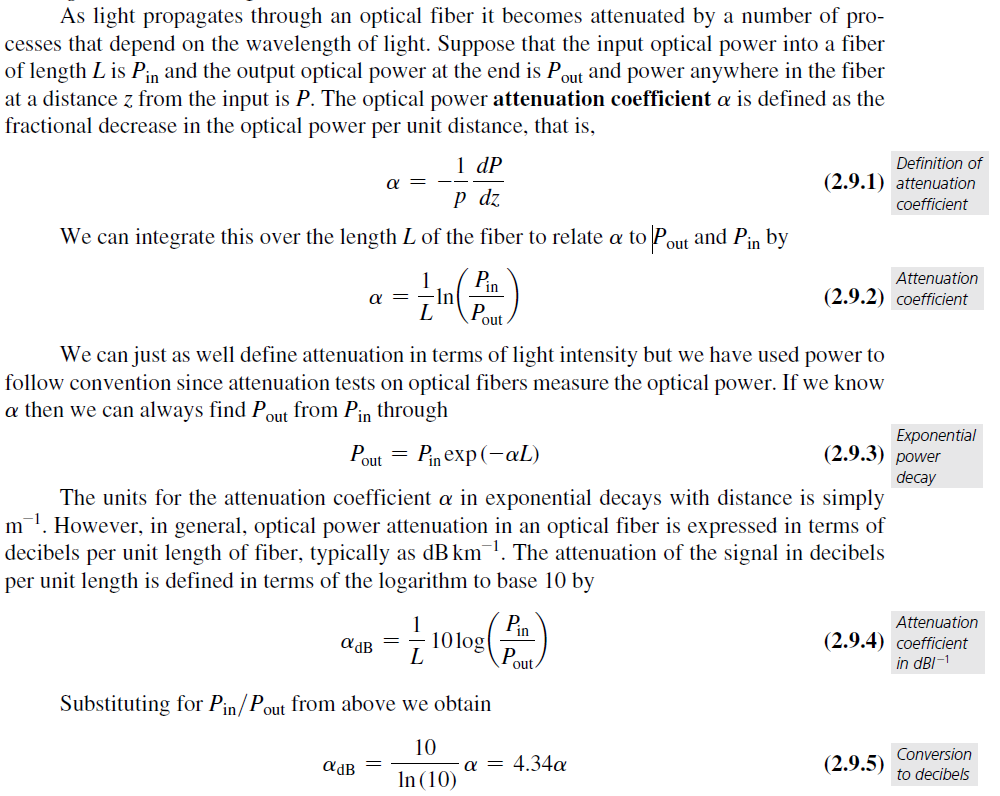


#### (F) (5 points) Démontrez que:
$$ \alpha [1/m] = \frac{4 \pi Im(n)}{\lambda}, $$

où $Im(n)$ est la partie imaginaire de l'indice de réfraction d'un milieu homogène.

# -Réponse

Le coefficient d'atténuation est défini par l'équation suivante selon S.O. Kasap, p.43, eq. 1.8.1 :
$$\alpha = - \delta I/ I\delta z$$
I étant l'éclairement énergétique (*irradiance*) et z la direction de propagation.
Considérons ce qui arrive à une onde plane monochromatique ayant un champ électrique complexe de :
$$\tilde{E} = \tilde{E}_0 \exp(j (\omega t - k z))$$
Où \omega est la fréquence angulaire et k, la constante de propagation complexe. 
On peut diviser cette constante de propagation en une partie réelle ($k'$) et complexe ($k"$) et réécrire l'équation du champ électrique de cette manière : 
$$\tilde{E} = \tilde{E}_0 \exp(j (\omega t - k' z))\exp(-k"z)$$
La partie réelle ($k'$) décrit les caractéristiques de propagation (ex. la vitesse de phase $v_p = \omega/k'$) tandis que la partie imaginaire ($k"$) décrit l'atténuation selon z.
L'irrandiance est liée au champ électrique selon l'équation 1.8.6 p.44 du S.O. Kasap :
$$ I \propto |E^2| \propto \exp(-2k"z) $$
Ainsi, le changement dans l'irradiance est :
$$ \delta I/\delta z = -2k"I$$
En utilisant l'équation 1.8.1 et celle-ci, on peut déduire que 
$$ \alpha = 2k"$$
L'indice de réfraction du milieu de propagation est lui aussi complexe. Sa définition mathématique est comme suit :
$$ N = n-jK $$
Où $N$ est l'indice de réfraction complexe, $n$ sa partie réelle et $K$ sa partie complexe.
On peut relier les parties réelles ($n$) et complexes ($K$) de cet indice de réfraction à la constante de propagation.
$n = k'/k_0$ et $K = k"/k_0$
Ou encore, pour le besoin du problème, $ k" = Im(n)k_0 $ avec $ k_0 = 2\pi /\lambda $
Ainsi,
$$ \alpha = 2k"$$
$$ \alpha = 2(Im(n)k_0)$$
$$ \alpha = 2\frac{Im(n)2 \pi }{\lambda}$$
$$ \alpha [1/m] = \frac{4 \pi Im(n)}{\lambda}$$



#### (G) (5 points) Un laser émettant des photons à un taux de 1.51 $\times 10^{16}$ par seconde à une longueur d'onde de 600 nm se propage dans un guide d'onde avec des pertes $ ( \alpha ) $ de 2 dB/cm. Tracez la puissance du laser en fonction de la distance parcourue. Quelle est la puissance mesurée après 1 cm de propagation? Donnez votre réponse en dBm et en mW.

Premièrement, il est important d'identifier l'énergie des photons envoyés et de déduire la puissance P(O) du laser.
Sachant que, l'énergie d'un photon est reliée à sa longueur d'onde avec 
$$ E = hc/\lambda $$
On peut calculer l'énergie du laser par unité de temps (en joule/s). Pratiquement, 1 Joules/secondes = 1 Watt. Ainsi, on obtient la puissance P(0) du laser.


La puissance initiale du laser est: 5.002683 mW (6.99203) dBm.
La puissance à 1 cm est: 3.15648 mW ou 4.99203 dBm.
La ligne jaune est superposée su la ligne bleue montrant que les deux équations sont égales


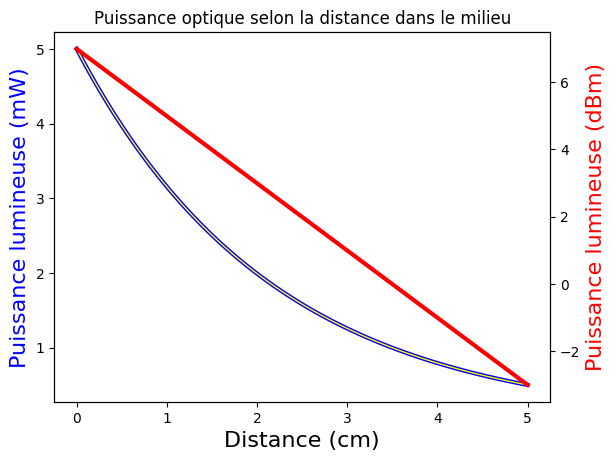

In [60]:
# Calculer la puissance P(0) du laser
import math
import scipy.constants as cte
import matplotlib.pyplot as plt
import matplotlib.axes as pltax
import numpy as np

lambda5 = 600e-9        # nm
taux = 1.51e16          # Photons/s
alpha_db_5 = 2          # dB/cm

P_initiale_lin = taux*cte.Planck*cte.c/lambda5*1000    # en mW
P_initiale_dBm = 10*math.log10(P_initiale_lin/1)     # comparaison avec 1mW pour des dBm
print("La puissance initiale du laser est: " + str(round(P_initiale_lin,6)) + " mW ("+str(round(P_initiale_dBm,6))+") dBm.")


nbre_pts = 101
fin = 5                                   #cm
distance = np.linspace(0,fin,101)         #cm
bases = np.full((101),10)

Power_db = P_initiale_dBm-alpha_db_5*distance
Power_mW = np.power(bases,(Power_db/10))            #mW
Power_mW_estime = P_initiale_lin*np.exp(-alpha_db_5/(10*math.log10(math.e))*distance)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title("Puissance optique selon la distance dans le milieu")
ax2.plot(distance,Power_db, linewidth = 3, color = 'red')
ax1.plot(distance,Power_mW, linewidth = 3, color = 'blue')
ax1.plot(distance,Power_mW_estime, linewidth = 1, color = 'yellow')

ax1.set_xlabel('Distance (cm)', fontsize=16)
ax2.set_ylabel('Puissance lumineuse (dBm)', fontsize=16, color = 'red')
ax1.set_ylabel('Puissance lumineuse (mW)', fontsize=16, color = 'blue')

print("La puissance à 1 cm est: " + str(round(Power_mW[int((nbre_pts-1)/fin)],6)) + " mW ou "+ str(round(Power_db[int((nbre_pts-1)/fin)],6))+" dBm.")
print("La ligne jaune est superposée su la ligne bleue montrant que les deux équations sont égales")


# Question 2 - Interface en diélectriques et condition modale (30%)


#### (A) (8 points) Une onde se propageant dans un milieu 1 arrive à incidence normale sur l’interface avec un milieu 2.

**(i) (2 points)**  
Une onde électromagnétique se propage dans un milieu 1 (avec une permittivité $ \epsilon_1 = 4.0 $) et arrive à incidence normale sur une interface avec un milieu 2 (avec une permittivité $ \epsilon_2 = 1.0 $). Calculez la réflectivité et la transmittance à l'interface pour l'onde TE en utilisant les équations de Fresnel. Démontrez que la puissance est conservée dans ce cas sans pertes.

**(ii) (2 points)**  
Une onde électromagnétique se propage dans un milieu 1 (avec une permittivité $ \epsilon_1 = 4.0 $) et arrive à incidence normale sur une interface avec un milieu 2, qui a une permittivité complexe ($ \epsilon_2 = 1.0 - j0.1 $). Calculez la réflectivité et la transmittance à l'interface pour l'onde TE en utilisant les équations de Fresnel. Incluez l'amplitude et la phase des coefficients de réflexion et de transmission. Discutez si la puissance est conservée dans ce cas avec pertes, et décrivez l'impact de la permittivité complexe sur le champ transmis.

**(iii) (2 points)**  
Comparez et commentez les différences de réflectivité, transmittance et conservation de la puissance entre les cas sans pertes ($ \epsilon_2 = 1.0 $) et avec pertes ($ \epsilon_2 = 1.0 - j0.1 $). Discutez des implications physiques d'avoir une permittivité complexe pour le second milieu sur la réflexion et la transmission des ondes électromagnétiques, en se concentrant particulièrement sur l'effet d'absorption et son influence sur la conservation de l'énergie.

**(iv) (2 points)**  
Calculez la différence de phase du champ transmis entre les cas sans pertes et avec pertes. Discutez de la signification de cette différence de phase dans des applications pratiques impliquant la propagation des ondes dans des milieux avec pertes.



#### Instructions
- Utilisez les expressions pour le coefficient de réflexion ($ r^{TE} $) et le coefficient de transmission ($ t^{TE} $) pour les ondes TE :

  $$
  r^{TE} = \frac{k_{ix} - k_{tx}}{k_{ix} + k_{tx}}, \quad t^{TE} = \frac{2k_{ix}}{k_{ix} + k_{tx}}
  $$

  où $ k_{ix} $ et $ k_{tx} $ sont les composantes x des vecteurs d'onde dans les milieux 1 et 2, respectivement.

- Fournissez des solutions étape par étape pour chaque partie de la question. Incluez les calculs de la magnitude et de la phase des coefficients de réflexion et de transmission.

- Discutez des résultats en termes de conservation de la puissance et de l'impact des propriétés des matériaux sur la propagation des ondes électromagnétiques. Incluez des commentaires détaillés sur les implications physiques d'une permittivité complexe dans des applications pratiques.

- Assurez-vous que tous les calculs sont clairement expliqués et présentés dans les cellules du notebook.

# Réponse - Numéro i)

La constante de propagation $k_{ix}$ est reliée à l'indice de réfraction (et la permitivité $\epsilon _r$) avec l'équation suivante : 
$$ N = n - jK = k / k_0 = (1/k_0)[k'-k­'']$$
On peut donc trouver la constante de propagation en calculant l'indice de réfraction selon la permitivité. Les formules suivantes nous permettent d'y arriver :  
$$ n^2 - K^2 = \epsilon _r'$$
$$ 2nK = \epsilon _r''$$ 

Dans le numéro i), la constante de propagation sera réelle tandis que dans le numéro ii), celle-ci sera complexe dans le deuxième milieu. 

Une fois la constante de propagation trouvée, on peut utiliser les équations suivantes pour trouver les coefficient de transmission et de réflexion :   
$$
r^{TE} = \frac{k_{ix} - k_{tx}}{k_{ix} + k_{tx}}, \quad t^{TE} = \frac{2k_{ix}}{k_{ix} + k_{tx}}
$$
dont la magnitude est $|r^{TE}| = \sqrt{(Re\{r^{TE}\}^2 + Im\{r^{TE}\}^2)}$ et sa phase $ tan^{-1}\left(\frac{Im\{r^{TE}\}}{Re\{r^{TE}\}}\right) $.
Une fois ces coefficients trouvés, on peut trouver l'équation du champ électrique résultant avec
$$ r_\perp = \frac{E_{ro,\perp}}{E_{io,\perp}}, \quad t_\perp = \frac{E_{to,\perp}}{E_{io,\perp}}$$
Une fois les équations de champs trouvés, on peut avoir les transmittance et la réflectance avec :
$$ R_{TE} = \frac {|E_r|^2}{|E_i|^2}, \quad T_{TE} = \frac{n_2}{n_1}\frac {|E_t|^2}{|E_i|^2} $$
Il est aussi important de rappeller que si $R_{TE} + T_{TE} = 1$, aucune énergie n'est perdu à l'interface. 


Le Kasap propose des équations simplifiées pour une incidence normale, avec $N = n - jK$ et $N = N_1/N_2$ , le coefficient de réflexion est : 
$$ r_{TE} = \frac{1-n+jK}{1+n-jK}$$
$$ t_{TE}= \frac{2}{1+n - jK} $$
De plus, ces deux coefficient devraient être reliés par :
$$ r_{TE} + 1 = t_{TE}$$
Et la réflectance et la transmittance sont :
$$ R_{TE} = \left|\frac{n -jK -1}{n-jK+1}\right|^2=\frac{(n-1)^2+K^2}{(n+1)^2+K^2}$$ 
$$ T_{TE} = \frac{4n}{|(n-jK+1)|^2} $$ 
L'équation de la transmittance n'est pas directement disponible dans le Kasap, par contre elle l'est dans Nichelatti, E., 2002. Complex refractive index of a slab from reflectance and transmittance: analytical solution. Journal of Optics A: Pure and Applied Optics, 4(4), pp.400-403.

Pour vérifier la validité, $R_{TE}+T_{TE} <=1$ va être vérifié, du plus l'équation dans le Kasap : $T_{TE} = n \times |t_\perp|^2 $ sera aussi calculée.






In [56]:
import scipy.constants as cte
import math
import cmath
er_1 = 4
er_2 = 1 

N1 = math.sqrt(er_1)
N2 = math.sqrt(er_2)            #Bon, sqrt de 1 = 1, for the sake of code reusability

N = N2/N1

r_TE = (1 - N.real + 1j*N.imag)/(1 + N.real - 1j*N.imag)
t_TE = 2/(1+N.real - 1j*N.imag)

#Calcul de leur phase et de leur magnitude
mag_r_TE = (r_TE.real**2+(1j*r_TE.imag)**2)**(1/2)      # abs() is functionnal also
phase_r_TE = cmath.atan(r_TE.imag/r_TE.real)         # cmath.phase() is functionnal also
mag_t_TE = (t_TE.real**2+(1j*t_TE.imag)**2)**(1/2)      # cmath.polar() also create a table with the amplitude [0] and phase [1] in the same variable
phase_t_TE = cmath.atan(t_TE.imag/t_TE.real)

print('Condition rte +1 == tte?')
print(r_TE +1 == t_TE)

print("Voici les magnitudes et les phases des coefficients")
print("r_te magnitude: " + str(round(abs(mag_r_TE),5)) + " r_te phase: " + str(round(math.degrees(abs(phase_r_TE)),5))+ " degrés")
print("t_te magnitude: " + str(round(abs(mag_t_TE),5)) + " t_te phase: " + str(round(math.degrees(abs(phase_t_TE)),5))+ " degrés")

# Calcul de la réflectance te de la transmittance
R_TE = ((N.real-1)**2+(1j*N.imag)**2)/((N.real+1)**2+(1j*N.imag)**2)
T_TE = 4*N.real/(abs(N.real-1j*N.imag+1)**2)


print('Condition RTE + TTE == 1?')
print(T_TE + R_TE == 1)                                 # Valide la condition de conservation de l'énergie sans pertes
print('Formule Kasap == formule de l\'article?')                                
print(T_TE == N2.real/N1.real*abs(t_TE)**2)            # Valide avec la formule du KASAP
print("Voici la réflectance: " + str(round(abs(R_TE),5))+ " et la transmittance: "+str(round(T_TE,5)))


Condition rte +1 == tte?
True
Voici les magnitudes et les phases des coefficients
r_te magnitude: 0.33333 r_te phase: 0.0 degrés
t_te magnitude: 1.33333 t_te phase: 0.0 degrés
Condition RTE + TTE == 1?
True
Formule Kasap == formule de l'article?
True
Voici la réflectance: 0.11111 et la transmittance: 0.88889




### Numéro II)
Recommencer avec un différent $\epsilon _r$, qui est complexe maintenant. 

In [59]:
import scipy.constants as cte
import math
import cmath
er_1 = 4
er_2 = 1 - 0.1*1j

N1 = cmath.sqrt(er_1)
N2 = cmath.sqrt(er_2)           

N = N2/N1

# Calcul des coefficients de réflexion et de transmission
r_TE = (1 - N.real + 1j*N.imag)/(1 + N.real - 1j*N.imag)
t_TE = 2/(1+N.real - 1j*N.imag)

#Calcul de leur phase et de leur magnitude
mag_r_TE = (r_TE.real**2+(1j*r_TE.imag)**2)**(1/2)      # abs() is functionnal also
phase_r_TE = cmath.atan(r_TE.imag/r_TE.real)         # cmath.phase() is functionnal also
mag_t_TE = (t_TE.real**2+(1j*t_TE.imag)**2)**(1/2)      # cmath.polar() also create a table with the amplitude [0] and phase [1] in the same variable
phase_t_TE = cmath.atan(t_TE.imag/t_TE.real)

print("Voici les magnitudes et les phases des coefficients")
print("r_te magnitude: " + str(round(abs(mag_r_TE),5)) + " r_te phase: " + str(round(math.degrees(abs(phase_r_TE)),5))+ " degrés")
print("t_te magnitude: " + str(round(abs(mag_t_TE),5)) + " t_te phase: " + str(round(math.degrees(abs(phase_t_TE)),5))+ " degrés")

print('Condition rte +1 = tte?')
print(r_TE +1 == t_TE)

# Calcul de la réflectance te de la transmittance
R_TE = ((N.real-1)**2+(1j*N.imag)**2)/((N.real+1)**2+(1j*N.imag)**2)
T_TE = 4*N.real/(abs(N.real-1j*N.imag+1)**2)


print('Condition RTE + TTE = 1?')
print(T_TE + abs(R_TE)==1)                                 # Valide la condition de conservation de l'énergie
print('Condition RTE + TTE < 1?')
print(T_TE + abs(R_TE)<1)
print('La somme de RTE + TTE =')
print(T_TE + abs(R_TE))
print('TTE calculé avec la formule de l\'article == Re(N2)/Re(N1)*|tte|^2?')
print(T_TE == N2.real/N1.real*abs(t_TE)**2)                # Valide avec la formule du Kasap 
print("Voici la réflectance: " + str(round(abs(R_TE),5))+ ", la transmittance: "+str(round(T_TE,5)) + " et les pertes: " + str(round(1-(T_TE + abs(R_TE)),5)))

Voici les magnitudes et les phases des coefficients
r_te magnitude: 0.33167 r_te phase: 3.81567 degrés
t_te magnitude: 1.33223 t_te phase: 0.95326 degrés
Condition rte +1 = tte?
True
Condition RTE + TTE = 1?
False
Condition RTE + TTE < 1?
True
La somme de RTE + TTE =
0.9995076060161763
TTE calculé avec la formule de l'article == Re(N2)/Re(N1)*|tte|^2?
True
Voici la réflectance: 0.1105 ,la transmittance: 0.88901 et les pertes: 0.00049


#### Numéro III) 

Vu que la transmittance et la réflectance n'égale pas à 1, il y a des pertes d'énergie dans la transmission dans un milieu avec un indice de réfraction complexe. 
Cette perte n'est pas grande, dans cet exercice, 99,95% de l'énergie est soit transmise ou réfléchie.
De plus, si on regarde les coefficient de transmission et de réflexion, les deux sont complexes. La partie complexe de ces coefficient correspond à un ajout de phase au champ électrique qu'il soit réfléchi ou transmit. 
Ainsi, la formule $R + T = 1$ devrait devenir $R + T + A = 1$ où le A représente les pertes. Cette équation est la loi de radiation de Kirchoff. 
Le coefficient complexe amène aussi des pertes dans le milieu, plus l'onde réfléchies continue dans le milieu 2, plus elle est atténuée. 
Sans pertes, la réflectance est de 0.1111 contre 0.1105 avec les pertes. Pour ce qui est de la transmittance, 0,8889 contre 0,8890. Il y a très peu de différences au niveau de la transmission/de réflexion de puissance. Au niveau de l'amplitude on pert un peu d'amplitude dans les coefficients (0.3333 vs 0.3318 et 1.333 vs 1.332) mais on obtient une phase supplémentaire (3.8157 et 0.9532 degrés) dans les deux coefficients, qui se répercute sur les champs électriques réfléchi (3.8157) et transmit (0.9532).


#### Numéro IV)
Tel que mentionné au numéro précédent, l'incrément de la phase sur la transmission pourrait faire en sorte qu'il y ait un débalancement dans un interféromètre. Par exemple, si on avait allongé un bras d'interféromètre pour avoir une interférence destructive complète, l'ajout d'un peu de phase ferait en sorte que cette interférence destructive ne serait pas complète. Ou encore, si on a pris en compte l'indice de réfraction complexe, l'interféromètre pourra être plus compact. 

Comme la somme des parties réelles de la transmittance et de la réflectance est égale à 1, il y a conservation de la puissance à l'interface, mais à l'interface seulement. Par contre, le champ électrique transmit subit un changement de phase qui est proportionnel à la portion imaginaire. De plus, vu qu'il y une permitivité complexe dans le deuxième milieu, le champ électrique commencera à décroitre de façon exponentielle en puissance suivant le coefficient $\alpha$ dont l'équation : 
$$$$
$$ \alpha = 2\frac{Im(n)2 \pi }{\lambda}$$ 
Où la permitivité complexe est dans l'indice de réfraction imaginaire $ n = c \sqrt{\epsilon _0 \epsilon _r \mu _0} $.

Une autre application utile de cette particularité mathématique est l'identification de l'indice de réfraction du matériel. On peut savoir si l'indice de réfraction de ce matériel est complexe si il déphase le signal. 

#### (B) (6 points) Une onde est incidente ($\theta_i$ = 25°) sur un empilement de 5 couches diélectriques dont les permittivités
sont [1.5, 2.0, 3.0, 2.0, 1.5]. Quel sera l’angle à la sortie de l’empilement ?

In [45]:
# -réponse
import math
import scipy.constants as cte
n0 = 1
n1 = 1.5
n2 = 2
n3 = 3
n4 = 2
n5 = 1.5
theta_i = math.radians(25)      #converti des degrés en radians   

#Hypothèse : le même angle vu qu'on sort du milieu 1.5
#Selon la relation n1sin(theta_i)=n2sin(theta_t), on va garder le sin(theta_t) vu qu'il sera utile pour la prochaine équation. 
sin_theta_1 = n0/n1*math.sin(theta_i)
sin_theta_2 = n1/n2*sin_theta_1
sin_theta_3 = n2/n3*sin_theta_2
sin_theta_4 = n3/n4*sin_theta_3
sin_theta_5 = n4/n5*sin_theta_4
angle_sortie = math.degrees(math.asin(n5/n0*sin_theta_5))

print("L\'angle de sortie sera de: "+ str(round(angle_sortie,4))+" degrés")
print("Même angle que l'angle d'entrée? " + str(round(theta_i,3)==round(math.radians(angle_sortie),3)))

if round(theta_i,3)==round(math.radians(angle_sortie),3):
    print("Hypothèse confirmée")




L'angle de sortie sera de: 25.0 degrés
Même angle que l'angle d'entrée? True
Hypothèse confirmée


#### (C) (6 points) Pour une onde incidente d’un milieu 1 sur un mileu 2 avec n1 = 3.481, n2 = 1.484 et $\theta_i$ = 80°, trouvez la profondeur à laquelle l’amplitude du champ électrique du mode TE atteint sa valeur 1/e si $\lambda_0$ = 1550 nm.

In [46]:
# Étape 1: Vérifier que l'angle d'incidence dépasse l'angle critique
import math
n1 = 3.481
n2 = 1.484
angle_initial = 80
angle_critique = math.degrees(math.asin(n2/n1))
print("L\'angle critique est de: "+ str(round(angle_critique,3))+" degrés.")
print("Est-ce que l\'angle initial dépasse l'angle critique? "+ str(angle_initial>angle_critique))

if angle_initial>angle_critique:
    print("Nous somme en présence d'une réflexion totale interne.")
    print("Ktx devient donc complexe")


L'angle critique est de: 25.234 degrés.
Est-ce que l'angle initial dépasse l'angle critique? True
Nous somme en présence d'une réflexion totale interne.
Ktx devient donc complexe


#### Selon l'équation 1.6.14 du Kasap, le coefficient d'atténuation de l'onde evanescante qui est crée peut être calculé avec :
$$ \alpha _2 = \frac{2\pi n_2}{\lambda _0} \left[{\left(\frac{n_1}{n_2}\right)^2 sin^2\theta _i -1}\right] ^{1/2} $$
De plus, la longueur de pénétration peut être définie comme suit : 
$$ \delta = 1/\alpha _2 $$

Maintenant, aux calculs:

In [47]:
import math
import scipy.constants as cte # type: ignore
n1 = 3.481
n2 = 1.484
angle_initial = math.radians(80)
lambda_0 = 1550e-9      #nm

alpha_2 = 2*cte.pi*n2/lambda_0*((n1/n2)**2*(math.sin(angle_initial))**2-1)**(1/2)

penetration = 1/alpha_2 *1e9    #conversion unité

print("La longueur de pénétration dans le milieu est de: " + str(round(penetration,4)) + " nm.")

La longueur de pénétration dans le milieu est de: 79.8282 nm.


#### (D) (5 points) Il est possible de réaliser un polariseur à partir de lames de verres inclinée selon l'angle de Brewster. On vous demande de calculer l'angle à laquelle la lame devrait être inclinée ainsi que de calculer les coefficients de la matrice de Jones (en transmission) pour une lame de silice (SiO $_2 $ ). Considérez que $ n_{SiO_2}=1.44 $ et que la lumière incidente se propage dans l'air $n_{air}=1.0$. Assumez que la propagation de la lumière dans la silice n'induit pas de pertes optiques.

Premièrement, la définition de l'angle de Brewster est :
$$ tan \theta _p = n_2/n_1 $$
Avec $n_2 = 1.44$ et $n_1 = 1$.

In [48]:
# Calcul de l'angle de brewster
import math
n1=1
n2 = 1.44
brewster = math.degrees(math.atan(n2/n1))

print("L\' angle de brewster est de "+ str(round(brewster,3)) + " degrés.")


L' angle de brewster est de 55.222 degrés.


Sachant maintenant l'angle d'incidence, on peut calculer les coefficients de transmission $t_\perp$ et $t_\|$ avec les formules suivantes:
$$ t_\perp = \frac{2cos\theta _i}{cos\theta _i + \left[n^2 - sin^2\theta _i\right]^{1/2}}$$
et
$$ t_\| = \frac{2ncos\theta _i}{n^2cos\theta _i + \left[n^2 - sin^2\theta _i\right]^{1/2}}$$

In [61]:
import math
n1 = 1
n2 = 1.44
n=n2/n1  # en d'autres mots, n2
brewster = math.atan(n)

t_perp = 2*math.cos(brewster)/(math.cos(brewster)+(n**2-math.sin(brewster**2))**(1/2))
t_para = 2*n*math.cos(brewster)/(n**2*math.cos(brewster)+(n**2-math.sin(brewster**2))**(1/2))

r_perp = (math.cos(brewster)-(n**2-(math.sin(brewster)**2)**(1/2)))/(math.cos(brewster)+(n**2-(math.sin(brewster)**2)**(1/2)))
r_para = 0

print("Le coefficient en transmission perpendiculaire est : "+str(round(t_perp,3)))
print("Le coefficient en transmission parrallele est : "+str(round(t_para,3)))
print("Le coefficient en réflexion perpendiculaire est : "+str(round(r_perp,3)))

Le coefficient en transmission perpendiculaire est : 0.672
Le coefficient en transmission parrallele est : 0.711
Le coefficient en réflexion perpendiculaire est : -0.374


En définisant que les ondes se propagent dans la direction Z, (i.e. que chaque  onde a un système d'axe lui état propre), tout en gardant la direction X qui sort de la feuille et y perpediculaire à Z et X, la matrice de Jones peut être définie ainsi : 

$\left[\begin{array}{cc} 
0.672 & 0\\ 
0 & 0.711 
\end{array}\right]$

Ce système chagement de système d'axe fait en sorte que les composantes perpediculaires et parallèle de l'onde incidente sont exactement alignée sur les axes propres à l'onde incidente. De la même façon, le changement de système d'axe pour l'onde transmise (et réfléchie) fait aussi en sorte que les composantes perpendiculaires et parallèles sont alignés sur les axes, même si entre les deux systèmes d'axes il y a une rotation du système d'axe. 



#### (E) (5 points) Démontrez, étape par étape, que la condition modale pour le guide d'onde plan illustré ci-dessous est donné par: $$ 4 \text{a} k_1 \cos(\theta_1) - 2 \Delta \phi_{\text{TIR}} = 2 \pi m. $$ Par la suite démontrez que la condition modale pour le mode TE peut etre donné par : $$ \tan\left(\frac{k d \cos \theta_m - m \pi}{2}\right) = \frac{\sqrt{\sin^2(\theta_m) - \left(\frac{n_2}{n_1}\right)^2}}{\cos \theta_m} = f(\theta_m). $$ Illustrez la solution pour les 3 premiers modes. 
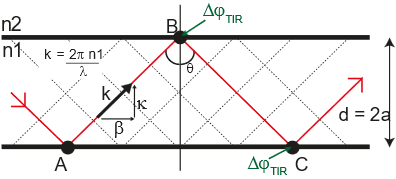


### Sous question 1
Prenons un diélectrique plan d'indice $n_1$ et d'épaisseur 2a qui est entouré de deux diélectrique d'indice $n_2$ tel que $n_1>n_2$. Les deux régions sont semi-infinie. De la lumière entre dans le diélectrique au point A et se propage dans la direction z. La figure suivante tiré du Kasap montre la situation présente : 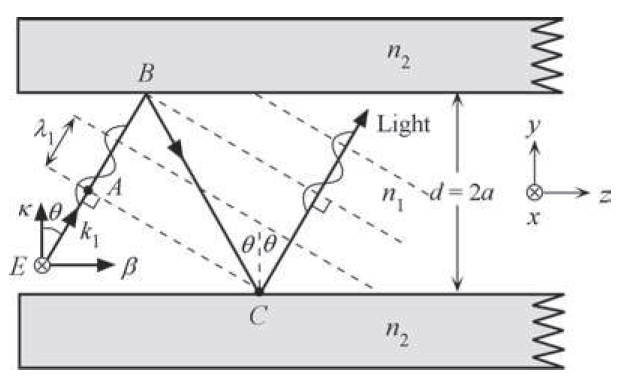

Pour qu'il y ait propagation de la lumière, celle-ci doit faire des interférences constructives avec elle-même. Ainsi la lumière qui est partie du point A doit faire une interférence constructive avec la lumière qui a fait le parcours AB + BC.
Pour faire une interférence constructive, il faut que la différence de phase entre ces deux ondes soit un multiple de $2\pi$ tel que décrit la formule suivante :
$$ \Delta \phi _{AC} = k_1(AB + BC) - 2\phi = m(2\pi) $$
Où $\Delta \phi _{AC}$ est la différence de phase entre les deux parcours, $k_1$ est la constante de propagation dans le milieu $n_1$ définie par $k_1 = kn_1 = 2\pi n_1/\lambda$, $\phi$ est le déphasage induit par la réflexion elle-même (doublée parce qu'il y a deux réflexion au poin B et C) et m, le mode de propagation, qui est un entier ( m = 0,1,2,3,4,...).
On peut évaluer le parcours $ AB + BC $ avec de la géométrie, ($BC = 2a/cos\theta$ et $AB = BC cos(2\theta$)), ainsi :
$$ AB + BC = BC cos(2\theta) + BC = BC \left[(2cos^2\theta - 1)+1\right] = 4a cos\theta $$ 
En remplaçant AB + BC dans l'expression de l'interférence constructive, on arrive avec : 
$$ k_1(4a cos\theta) - 2\phi = m(2\pi) $$
Si on remplace et réécrit avec les indices :
$$ 4 \text{a} k_1 \cos(\theta_1) - 2 \Delta \phi_{\text{TIR}} = 2 \pi m $$


### Sous question 2
Le déphase $\phi$ qui est ajouté lors de la réflexion totale interne peut être décrit par l'équation suivante:
$$ tan(\phi/2) = \frac{[sin^2\theta _i - n^2]^{1/2}}{cos \theta _i}$$
Où $\theta _i = \theta _m$, i.e. l'angle de la lumière dans le milieu $n_1$ et $d = 2a$ tel que présenté sur l'image.

La formule de condition du guide d'onde peut-être simplifiée en divisant par 2 les deux côtés de l'équation : 
$$ d k_1 \cos(\theta_1) -  \Delta \phi_{\text{TIR}} =  \pi m $$
en rebrassant l'équation ci-haut on peut obtenir:

$$\Delta \phi_{\text{TIR}} = d k_1 \cos(\theta_1) - \pi m $$
 
On peut inséré dans la fomule du déphasage 

$$ tan(\phi/2) = tan \left(\frac{d k_1 \cos(\theta _m) - \pi m}{2}\right) = \frac{[sin^2\theta _m - n^2]^{1/2}}{cos \theta _m} = f(\theta _m)$$


### Sous question 3
Voir script

Text(0, 0.5, 'tan(akcos(theta)-mpi/2)')

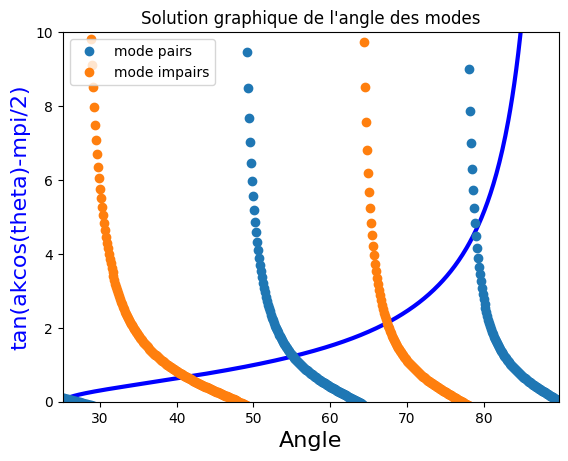

In [63]:
# Sous-question 3
import math
import numpy as np
import scipy.constants as cte
import matplotlib.pyplot as plt

n1 = 3.48
n2 = 1.48
n=n2/n1
angle_critique = math.asin(n)
#print(math.degrees(angle_critique))
nbre_pts=501
angle = np.linspace(angle_critique,cte.pi/2-cte.pi/2/nbre_pts,nbre_pts)

# posons les valeurs de d = 2e-6 (un guide d'onde de 2um d'épais) et de la longueur d'onde utilisée wvl = 1550e-9

wvl = 1550e-9
d = 500e-9

#Constante de propagation k = 2pi n1/lambda

k = 2*cte.pi*n1/wvl

f_angle = np.sqrt((np.sin(angle)**2-n**2))/np.cos(angle)
f_mode = np.empty((3,nbre_pts))

for mode in range(3):
    i = 0
    for theta in angle:
        f_mode[mode][i] = np.tan(d*k*np.cos(theta)-cte.pi*mode/2) 
        i +=1

fig, ax1 = plt.subplots()

ax1.plot(np.degrees(angle),f_angle,linewidth = 3, color = 'blue')
ax1.plot(np.degrees(angle),f_mode[0],'o', linewidth = 1, label = 'mode pairs')
ax1.plot(np.degrees(angle),f_mode[1],'o', linewidth = 1, label = 'mode impairs')
ax1.legend()
ax1.set_title("Solution graphique de l'angle des modes")
ax1.set_xlim(math.degrees(angle_critique),math.degrees(cte.pi/2-cte.pi/2/nbre_pts))
ax1.set_ylim(0,10)
ax1.set_xlabel('Angle', fontsize=16)
ax1.set_ylabel('tan(akcos(theta)-mpi/2)', fontsize=16, color = 'blue')

On peut voir sur la figure que les modes pairs croisent à environ 80 degrés,55 degrés et peut-être vers 25 degrés, proche de l'angle critique. Pour ce qui est des modes impairs, vers 68 degrés et 41 degrés. Les points sont les points calculés de la formule avec la tangente. Le mode fondamental est celui le plus proche de 90 degrés. Pour augemnter le nombre de points, il suffit d'augmenter la variable nbre_pts.

# Question 3 - Dispersion et propagation d'une impulsion optique (15%)

Considérez la propagation d'une impulsion optique dans un guide d'onde de lithium liobate ( $LiNbO_3$ ) sur une distance de 10 cm. L'indice de réfraction est donné par la formule de dispersion suivante:
$$ n^2-1=\frac{2.6734λ^2}{λ^2-0.01764}+\frac{1.2290λ^2}{λ^2-0.05914}+\frac{12.614λ^2}{λ^2-474.60}. $$

#### (A) (5 points) Tracez la vitesse de groupe en fonction de la longueur d'onde.
Sachant que la vitesse de groupe est définie par :
$$ v_g = \frac {\delta \omega}{\delta k} $$

Sachant que :
$\lambda = \frac {c}{f} = \frac {2\pi c}{\omega}$ 

et $ k = \frac{2 \pi n(\lambda)}{\lambda} $

On peut rebrasser les équations pour avoir 

$$\omega = \frac{2 \pi c}{\lambda} → \frac{\delta \omega}{\delta \lambda} = \frac{-2 \pi c}{\lambda ^2}$$
et
$$\delta k =  \frac{-2 \pi}{\lambda ^2} \left[n(\lambda) - \lambda n'(\lambda)\right]\delta \lambda$$

Mis ensemble, on peut trouver que:
$$\frac {\delta \omega}{\delta k} = \frac{c}{n(\lambda)-\lambda n'(\lambda)} $$

Ce qui est similaire à l'équation du Kasap:
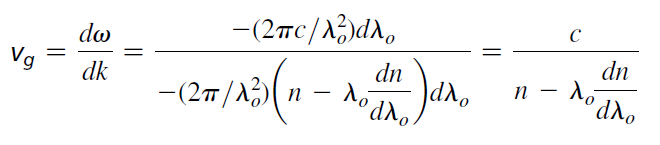


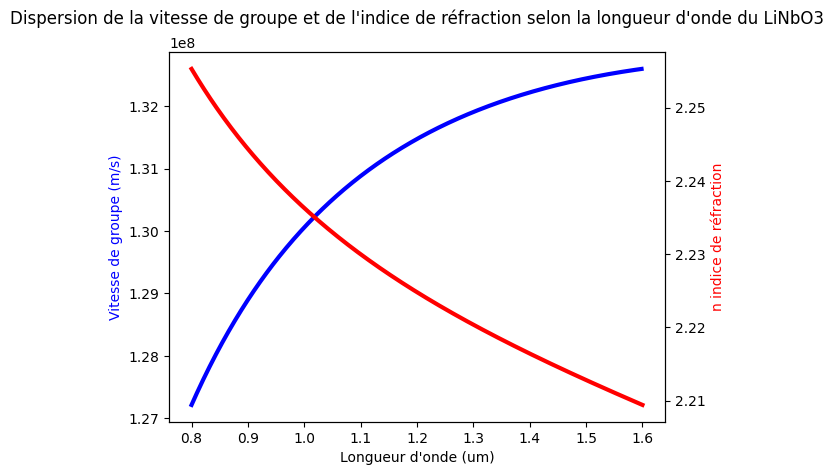

In [81]:
# -La vitesse de groupe est définie par c/n
import numpy as np
import scipy.constants as cte
import matplotlib.pyplot as plt

nbre_pts = 500
#en micron 
wvl1 = 0.8
wvl2 = 1.6

L = np.linspace(wvl1,wvl2,nbre_pts)

n = np.sqrt(2.6734*L**2/(L**2-0.01764)+1.229*L**2/(L**2-0.05914)+12.614*L**2/(L**2-474.6)+1)

dn_dL= np.empty(nbre_pts-1)
Vg = np.empty(nbre_pts-1)



# Dérivée numéro 1, faite au numéro précédent
for i in range(0,L.size-1,1):
    dn_dL[i] = (n[i+1]-n[i])/(L[i+1]-L[i])
    Vg[i] = cte.c/(n[i]-L[i]*(dn_dL[i]))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel("Longueur d'onde (um)")
ax1.set_ylabel("Vitesse de groupe (m/s)", color = 'blue')
ax1.set_title("Dispersion de la vitesse de groupe et de l'indice de réfraction selon la longueur d'onde du LiNbO3", pad=20)
ax1.plot(L[0:nbre_pts-1],Vg, linewidth = 3, color = 'blue')
ax2.set_ylabel("n indice de réfraction", color = 'red')
ax2.plot(L,n, linewidth = 3, color = 'red')



#### (B) (5 points) Tracez la dispersion de la vitesse de groupe (GVD) en fonction de la longueur d'onde. unités en fs $^2$ m $^{-1}$ .

La dispersion de la vitesse de groupe est définie comme suit : 
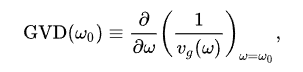 (tiré de wikipédia)

L'inverse de la vitesse de groupe est définie par : $$\frac {\delta k}{\delta \omega} = \frac{n(\lambda)-\lambda n'(\lambda)}{c} $$

Par le numéro précédent, on peut dire que : 

$$\frac {\delta k}{\delta \omega} = \frac{1}{c}\left[n(\omega)+\frac{\delta n(\omega)}{\delta \omega}\omega \right] $$
et
$$\frac{\delta \lambda}{\delta \omega} = \frac{-\lambda ^2}{2 \pi c}$$
Et par les règles de dérivation:
$$\frac{\delta}{\delta \omega} = \frac{\delta}{\delta \lambda}\frac{\delta \lambda}{\delta \omega}$$
En insérant l'un dans l'autre, on obtient :
$$GVD = \frac{\delta}{\delta \omega}\left(\frac{1}{v_g} \right) = \frac{-\lambda ^2}{2 \pi c}\frac{\delta}{\delta \lambda}\left[\frac{n(\lambda)-\lambda n'(\lambda)}{c}\right] = \frac{\lambda ^3}{2\pi c^2}\frac{\delta ^2 n(\lambda)}{\delta \lambda ^2}$$

Aussi, ne pas oublier que les longueurs d'ondes sont en $\mu m$, la vitesse de la lumière en $m/s$ et la deuxième dérivée de l'indice de réfraction en $\mu m^{-2}$. Il va falloir faire des conversions pour obtenir des $fs^2/m$.

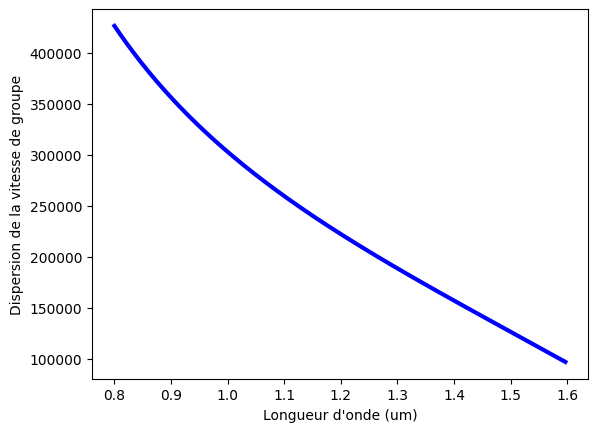

In [2]:
# -La vitesse de groupe est définie par c/n
import numpy as np
import scipy.constants as cte
import matplotlib.pyplot as plt

nbre_pts = 500
#en um
wvl1 = 0.8
wvl2 = 1.6

L = np.linspace(wvl1,wvl2,nbre_pts)

n = np.sqrt(1+2.6734*L**2/(L**2-0.01764)+1.229*L**2/(L**2-0.05914)+12.614*L**2/(L**2-474.6))

dn_dL= np.empty(nbre_pts-1)
dn2_d2L = np.empty(nbre_pts-2)
DVG = np.empty(nbre_pts-2)


# Dérivée numéro 1, faite au numéro précédent
for i in range(0,L.size-1,1):
    dn_dL[i] = (n[i+1]-n[i])/(L[i+1]-L[i])

for i in range(0,dn_dL.size-1,1):
    dn2_d2L[i] = (dn_dL[i+1]-dn_dL[i])/(L[i+1]-L[i])
    DVG[i] = (L[i])**3/(2*cte.pi*cte.c**2)*dn2_d2L[i]*1e-6   #Ajustement des unités 



fig, ax1 = plt.subplots()
ax1.set_xlabel("Longueur d'onde (um)")
ax1.set_ylabel("Dispersion de la vitesse de groupe")
#ax1.set_ylim()
ax1.plot(L[0:nbre_pts-2],DVG*1e30, linewidth = 3, color = 'blue') #Ajustement des unités en fs^2/m



#### (C) (10 points) Vous faites propager deux impulsions, la première à une longueur d'onde de 800 nm et la seconde à 1500 nm. Quel sera le délai entre ces deux impulsions après 10 cm.


In [53]:
import scipy.constants as cte

# Étape 1 : Calculer la vitesse des deux ondes
L800 = 0.8
L1500 = 1.5

v800 = cte.c/(np.sqrt(2.6734*L800**2/(L800**2-0.01764)+1.229*L800**2/(L800**2-0.05914)+12.614*L800**2/(L800**2-474.6)+1))
v1500 = cte.c/(np.sqrt(2.6734*L1500**2/(L1500**2-0.01764)+1.229*L1500**2/(L1500**2-0.05914)+12.614*L1500**2/(L1500**2-474.6)+1))

d = 0.01 #metre

t800 = d/v800
t1500 = d/v1500

delai = (t800-t1500) *1e12

print("Le délai sera de " + str(round(delai,4)) + " fs.")
print("C'est très peu comme délai mais c'est normal. La distance de 10cm est très courte.")

Le délai sera de 1.4149 fs.
C'est très peu comme délai mais c'est normal. La distance de 10cm est très courte.


# Question 4 - Méthode de l'indice effectif (20%)
Pour répondre aux questions suivantes, utilisez les base de données:

https://refractiveindex.info/?shelf=main&book=Si&page=Li-293K

https://refractiveindex.info/?shelf=main&book=SiO2&page=Malitson

Considérez la géométrie suivante:
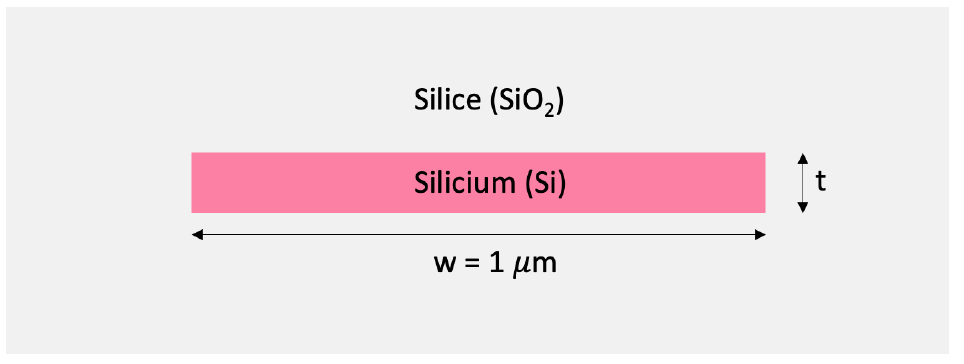
    


#### (A) (10 points) Écrire une fonction qui implémente la méthode de l'indice effectif. Cette fonction doit accepter les arguments suivants: un vecteur longueur d'onde, un scalaire largeur $w$ et un scalaire épaisseur $t$. Votre fonction doit retourner le mode fondamental TE.

In [54]:
import GEL4203_utils as fn

def sandwhich(wvl, t, w = 1e-6):
    nsilicon = 3.4757-0.08*(wvl-1550e-9)               #change avec la longueur d'onde
    nsilica = 1.444-0.012*(wvl-1550e-9)                #change avec la longueur d'onde
    neff_TE_a, neff_TM_a = fn.guide_1d_analytique(wvl,t,nsilica,nsilicon,nsilica,)
    neff_TM, neff_TE = fn.guide_1d_analytique(wvl,t=w,n1=nsilica,n2=neff_TE_a,n3=nsilica) # TE et TM sont inversé vu que la géométrie a subie une rotation
    return neff_TE[0][0]




#### (B) (5 points) Calculer l'indice de réfraction effectif pour le mode TE si $\lambda = 1550$ nm, t = 600 nm et w = 1.  

In [55]:
import GEL4203_utils as fn

def sandwhich(wvl, t, w = 1e-6):
    nsilicon = 3.4757-0.08*(wvl-1550e-9)               #change avec la longueur d'onde
    nsilica = 1.444-0.012*(wvl-1550e-9)                #change avec la longueur d'onde
    neff_TE_a, neff_TM_a = fn.guide_1d_analytique(wvl,t,nsilica,nsilicon,nsilica)
    #print(neff_TE_a)
    #print(neff_TM_a)
    neff_TM, neff_TE = fn.guide_1d_analytique(wvl,t=w,n1=nsilica,n2=neff_TE_a[0][0],n3=nsilica)
    return neff_TE[0][0]

La = 1550e-9
t = 600e-9
w = 1e-6
n = sandwhich(La,t,w)

print("L\'indice de réfraction pour le mode TE est : " + str(round(n,5)))

L'indice de réfraction pour le mode TE est : 3.23633


#### (C) (5 points) Utilisez l'outil Tidy3D pour résoudre le même guide d'onde que celui décrit en (B). Comparez les résultats obtenus avec ceux de la méthode de l'indice effectif. Commentez sur la précision et la vitesse des deux méthodes.

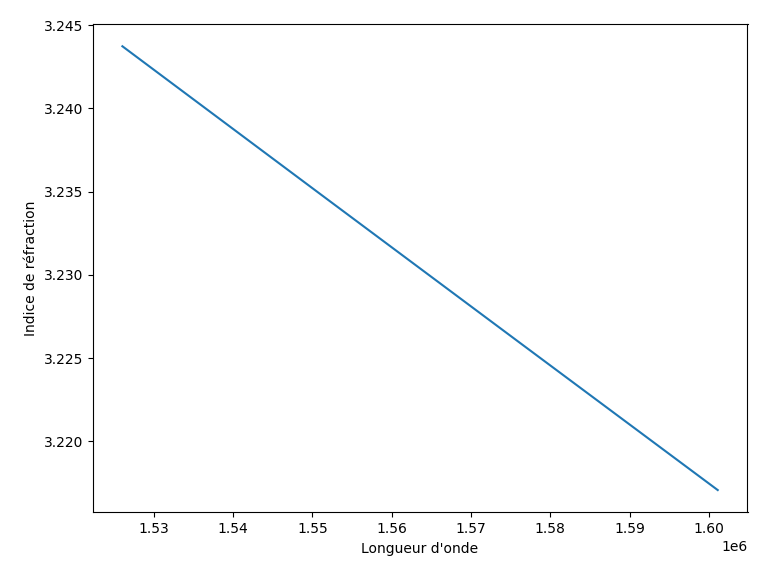


Image sortie des données de Tidy 3D.

On peut voir que à une longueur d'onde de 1550, l'indice de réfraction est d'environ de 3.234827 (tiré du graph à une fréquence de 193.4145 THz sur l'interface de Tidy3D), soit assez proche du 3.236 calculé par la méthode de l'indice effectif. 


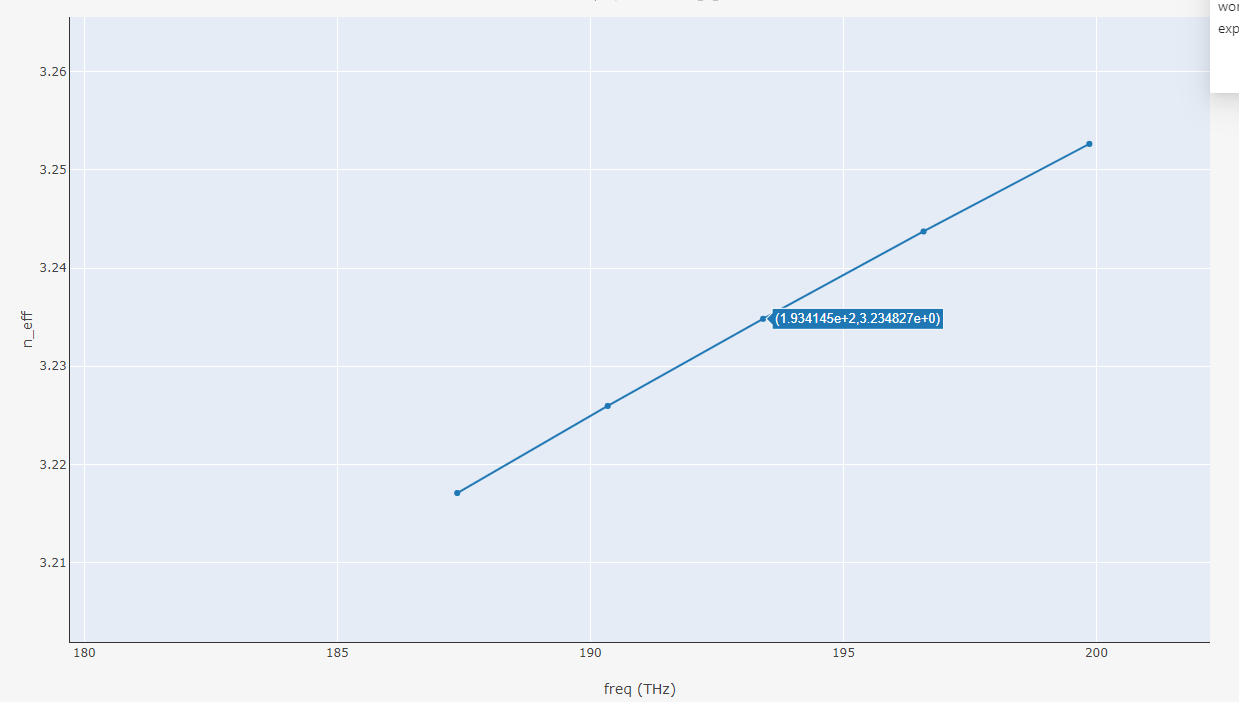